In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [13]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=2,random_state=13)

In [14]:
print(X.shape,y.shape)

(1000, 2) (1000,)


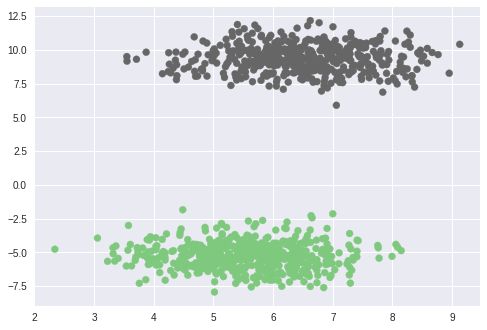

In [15]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Accent)
plt.show()

In [31]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [32]:
def predict(X,weights):
    prediction = np.dot(X,weights)
    prediction = sigmoid(prediction)
    return prediction

In [33]:
def loss(X,Y,weights):
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost

In [34]:
def update(X,Y,weights,learning_rate = 0.01):
    Y_ = predict(X,weights)
    dw = np.dot(X.T,(Y_-Y))
    
    m = X.shape[0]
    weights = weights - (learning_rate*dw)/m
    return weights

In [45]:
def train(X,Y,learning_rate = 0.01,max_iteration = 1000):
    
    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones,X))
    
    losses = []
    weights = np.zeros((X.shape[1],))
    
    for i in range(max_iteration):
        l = loss(X,Y,weights)
        losses.append(l)
        
        weights = update(X,Y,weights,learning_rate)
    
    return weights,losses

In [46]:
weights,losses = train(X,y)

In [47]:
print(weights)

[-0.04993434 -0.21976738  0.8892394 ]


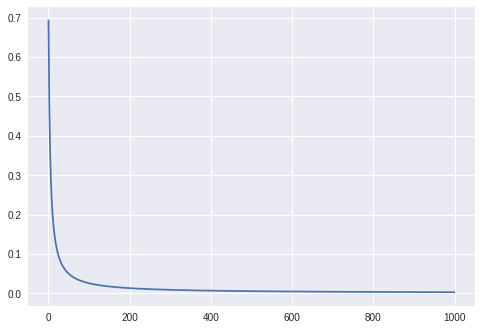

In [48]:
plt.plot(losses)
plt.show()

In [72]:
def predictTest(X_test,weights):
    
    ones = np.ones((X_test.shape[0],1))
    X_test = np.hstack((ones,X_test))
    
    probs = predict(X_test,weights)
    
    labels = np.zeros(probs.shape)
    
    labels[probs>=0.5] = 1
    
    return labels

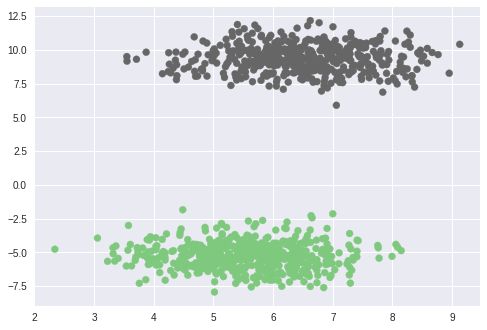

In [69]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent)
plt.show()

In [57]:
print(weights)

[-0.04993434 -0.21976738  0.8892394 ]


In [58]:
x1 = np.linspace(2,10,20)
x2 = -(weights[0]+weights[1]*x1)/weights[2]

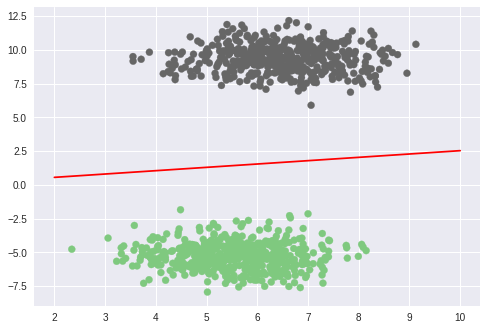

In [59]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()

In [73]:
Y_ = predictTest(X,weights)

In [79]:
np.sum(Y_== y)/X.shape[0]

1.0